## This is solution notebook for Project Assessment tasks.

**Author: Asima MISHRA** <br>
*Initial Submission Date (version 1): 15-Nov-2025* <br>
*Updated submission Date (Version 2): 23-Nov-2025*

### 1. Task 1 - Load your data

In [1]:
# Importing below libraries to be used for all 4 tasks
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt #used for plotting
from sklearn.linear_model import LinearRegression #used for linear regression

In [2]:
# Load data from 3 data files as per scope
df_stats = pd.read_csv("/workspaces/IATD-Python-Data/data/afl/stats.csv")
df_players = pd.read_csv("/workspaces/IATD-Python-Data/data/afl/players.csv")
df_games = pd.read_csv("/workspaces/IATD-Python-Data/data/afl/games.csv")


In [3]:
# Checking rows and columns numbers of the dataframe
df_stats.shape

(89470, 31)

In [4]:
df_stats.columns

Index(['gameId', 'team', 'year', 'round', 'playerId', 'displayName',
       'gameNumber', 'Disposals', 'Kicks', 'Marks', 'Handballs', 'Goals',
       'Behinds', 'Hit Outs', 'Tackles', 'Rebounds', 'Inside 50s',
       'Clearances', 'Clangers', 'Frees', 'Frees Against', 'Brownlow Votes',
       'Contested Possessions', 'Uncontested Possessions', 'Contested Marks',
       'Marks Inside 50', 'One Percenters', 'Bounces', 'Goal Assists',
       '% Played', 'Subs'],
      dtype='object')

In [5]:
# Checking rows and columns numbers of the dataframe
df_players.shape

(1495, 7)

In [6]:
df_players.columns

Index(['playerId', 'displayName', 'height', 'weight', 'dob', 'position',
       'origin'],
      dtype='object')

In [7]:
# Checking rows and columns numbers of the dataframe
df_games.shape

(2024, 12)

In [8]:
df_games.columns

Index(['gameId', 'year', 'round', 'date', 'venue', 'startTime', 'attendance',
       'homeTeam', 'homeTeamScore', 'awayTeam', 'awayTeamScore', 'rainfall'],
      dtype='object')

In [9]:
# Merge into a single data frame

merged_df = df_stats.merge(df_players, on='playerId').merge(df_games, on='gameId')

In [10]:
# Checking rows and columns numbers of the dataframe
merged_df.shape

(89470, 48)

In [11]:
merged_df.head(3)

,gameId,team,year_x,round_x,playerId,displayName_x,gameNumber,Disposals,Kicks,Marks,...,round_y,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall
0,2021R104,Adelaide,2021,R1,2021661124,"Berry, Sam",1,8,6,1,...,R1,20-Mar-2021,Adelaide Oval,4:05 PM,26985,Adelaide,103,Geelong,91,0.0
1,2021R104,Adelaide,2021,R1,2012662083,"Brown, Luke",168,5,2,0,...,R1,20-Mar-2021,Adelaide Oval,4:05 PM,26985,Adelaide,103,Geelong,91,0.0
2,2021R104,Adelaide,2021,R1,2020665315,"Butts, Jordon",3,10,5,3,...,R1,20-Mar-2021,Adelaide Oval,4:05 PM,26985,Adelaide,103,Geelong,91,0.0


### 2. Task 2 - Plot One Player

Our requirement is the following:

For a particular player - say "Franklin, Lance" - plot their accumlation of goals over time. The x-axis should be the number of games played and the y-axis should be the number of goals accumulated. Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

#### 2.1 Filter for specific player - Franklin, Lance

In [12]:
# We will filter the data for specific player requested
player_name = "Franklin, Lance"
player_df = merged_df[merged_df['displayName_x'] == player_name].copy()

In [13]:
player_df.columns

Index(['gameId', 'team', 'year_x', 'round_x', 'playerId', 'displayName_x',
       'gameNumber', 'Disposals', 'Kicks', 'Marks', 'Handballs', 'Goals',
       'Behinds', 'Hit Outs', 'Tackles', 'Rebounds', 'Inside 50s',
       'Clearances', 'Clangers', 'Frees', 'Frees Against', 'Brownlow Votes',
       'Contested Possessions', 'Uncontested Possessions', 'Contested Marks',
       'Marks Inside 50', 'One Percenters', 'Bounces', 'Goal Assists',
       '% Played', 'Subs', 'displayName_y', 'height', 'weight', 'dob',
       'position', 'origin', 'year_y', 'round_y', 'date', 'venue', 'startTime',
       'attendance', 'homeTeam', 'homeTeamScore', 'awayTeam', 'awayTeamScore',
       'rainfall'],
      dtype='object')

In [14]:
player_df.head(3)

,gameId,team,year_x,round_x,playerId,displayName_x,gameNumber,Disposals,Kicks,Marks,...,round_y,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall
7917,2021R203,Sydney,2021,R2,2005708162,"Franklin, Lance",301,9,7,2,...,R2,27-Mar-2021,S.C.G.,1:45 PM,23946,Sydney,121,Adelaide,88,0.0
7964,2021R401,Sydney,2021,R4,2005708162,"Franklin, Lance",302,9,7,4,...,R4,08-Apr-2021,S.C.G.,7:20 PM,28039,Sydney,83,Essendon,80,34.6
7986,2021R504,Sydney,2021,R5,2005708162,"Franklin, Lance",303,14,12,8,...,R5,17-Apr-2021,S.C.G.,4:35 PM,33541,Sydney,69,Greater Western Sydney,71,0.0


#### 2.2 Get min and max of year range from data for this player

In [15]:
player_df['year_x'].min()

np.int64(2012)

In [16]:
player_df['year_x'].max()

np.int64(2021)

#### 2.3 Sort by Year

In [17]:
player_df = player_df.sort_values('year_x')

In [18]:
player_df.head(3)

,gameId,team,year_x,round_x,playerId,displayName_x,gameNumber,Disposals,Kicks,Marks,...,round_y,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall
84985,2012R405,Hawthorn,2012,R4,2005708162,"Franklin, Lance",146,19,13,4,...,R4,21-Apr-2012,Subiaco,5:40 PM,40080,West Coast,51,Hawthorn,46,0.0
85007,2012R507,Hawthorn,2012,R5,2005708162,"Franklin, Lance",147,14,7,4,...,R5,29-Apr-2012,York Park,1:10 PM,19217,Hawthorn,69,Sydney,106,0.0
85030,2012R606,Hawthorn,2012,R6,2005708162,"Franklin, Lance",148,18,15,7,...,R6,05-May-2012,M.C.G.,7:40 PM,42290,St Kilda,88,Hawthorn,123,0.0


#### 2.4 Adjust

In [19]:
# Resetting and creating adjusted game count
player_df = player_df.reset_index(drop=True)
player_df['games_played_adjusted'] = player_df.index + 1

In [20]:
player_df.head(3)

,gameId,team,year_x,round_x,playerId,displayName_x,gameNumber,Disposals,Kicks,Marks,...,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall,games_played_adjusted
0,2012R405,Hawthorn,2012,R4,2005708162,"Franklin, Lance",146,19,13,4,...,21-Apr-2012,Subiaco,5:40 PM,40080,West Coast,51,Hawthorn,46,0.0,1
1,2012R507,Hawthorn,2012,R5,2005708162,"Franklin, Lance",147,14,7,4,...,29-Apr-2012,York Park,1:10 PM,19217,Hawthorn,69,Sydney,106,0.0,2
2,2012R606,Hawthorn,2012,R6,2005708162,"Franklin, Lance",148,18,15,7,...,05-May-2012,M.C.G.,7:40 PM,42290,St Kilda,88,Hawthorn,123,0.0,3


#### 2.5 Calculate Accumulated Goals

In [21]:
# Compute accumulated goals and add that column to the dataframe
player_df['cumulative_goals'] = player_df['Goals'].cumsum()

In [22]:
player_df.head(3)

,gameId,team,year_x,round_x,playerId,displayName_x,gameNumber,Disposals,Kicks,Marks,...,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall,games_played_adjusted,cumulative_goals
0,2012R405,Hawthorn,2012,R4,2005708162,"Franklin, Lance",146,19,13,4,...,Subiaco,5:40 PM,40080,West Coast,51,Hawthorn,46,0.0,1,1
1,2012R507,Hawthorn,2012,R5,2005708162,"Franklin, Lance",147,14,7,4,...,York Park,1:10 PM,19217,Hawthorn,69,Sydney,106,0.0,2,1
2,2012R606,Hawthorn,2012,R6,2005708162,"Franklin, Lance",148,18,15,7,...,M.C.G.,7:40 PM,42290,St Kilda,88,Hawthorn,123,0.0,3,6


#### 2.6 Plot

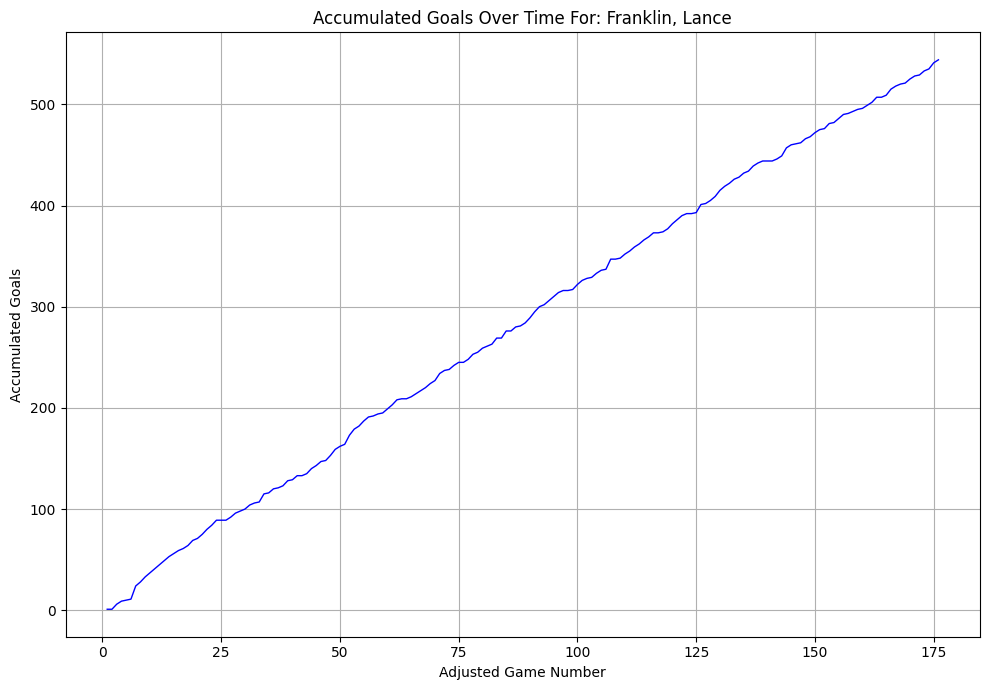

In [24]:
# Plot accumulation of goals over games
plt.figure(figsize=(10, 7))
plt.plot(player_df['games_played_adjusted'], player_df['cumulative_goals'], linestyle='-', color='b', linewidth=1)

# Label the axes and title
plt.title(f"Accumulated Goals Over Time For: {player_name}")
plt.xlabel("Adjusted Game Number")
plt.ylabel("Accumulated Goals")
plt.grid(True)
plt.tight_layout()

plt.show()

##### **Analysis Points**:

1. Steady goal-scoring patterns - The accumulated goals curve shows a consistently rising trend, confirming Franklin’s sustained scoring ability across his career: ~550 goals in around 175 games. Average of goals is almost 3.1 per match. There are no long flat segments, indicating he rarely had extended periods without goals.

2. Early career acceleration - The slope is relatively steep in the earlier part of the adjusted game sequence (roughly first 50 games), suggesting a strong goal-scoring phase during that period. In fact first, the average cumulative goal scored by him was almost 3.7 for first 15 matches.

3. Mid-career consistency - Between adjusted games ~50 to ~150, the line maintains a steady upward gradient, reflecting long-term consistency in performance with no significant dips.

4. Late-career insights - Even toward later adjusted game numbers (~150 onward), the slope remains positive and stable, demonstrating that Franklin continued to score reliably deep into his career. Of course, it probably slowed down a bit as opposed to his goal scoring average from early careers. 

5. Because the dataset begins at 2012, accumulated goals start from zero despite Franklin having already played many games before this period. The shape of the curve still accurately reflects his performance trajectory within the available time window.

### 3. Task 3 - Plot Multiple Players

The ask is to plot the lines for the following players, in the one chart: 

•	  "Franklin, Lance" <br>
•	  "Papley, Tom" <br>
•	  "Mumford, Shane" <br>
•	  "Hooker, Cale" <br>

We can plot each in a different colour so they can be distinguished and add a legend.


In [25]:
players = [
    "Franklin, Lance",
    "Papley, Tom",
    "Mumford, Shane",
    "Hooker, Cale"
]
colors = ["C0", "C1", "C2", "C3"]   # distinct colors to distinguish players

In [26]:
merged_df.columns

Index(['gameId', 'team', 'year_x', 'round_x', 'playerId', 'displayName_x',
       'gameNumber', 'Disposals', 'Kicks', 'Marks', 'Handballs', 'Goals',
       'Behinds', 'Hit Outs', 'Tackles', 'Rebounds', 'Inside 50s',
       'Clearances', 'Clangers', 'Frees', 'Frees Against', 'Brownlow Votes',
       'Contested Possessions', 'Uncontested Possessions', 'Contested Marks',
       'Marks Inside 50', 'One Percenters', 'Bounces', 'Goal Assists',
       '% Played', 'Subs', 'displayName_y', 'height', 'weight', 'dob',
       'position', 'origin', 'year_y', 'round_y', 'date', 'venue', 'startTime',
       'attendance', 'homeTeam', 'homeTeamScore', 'awayTeam', 'awayTeamScore',
       'rainfall'],
      dtype='object')

In [27]:
# required column names
player_col = "displayName_x"
goals_col = "Goals"
game_num_col = "gameNumber" 

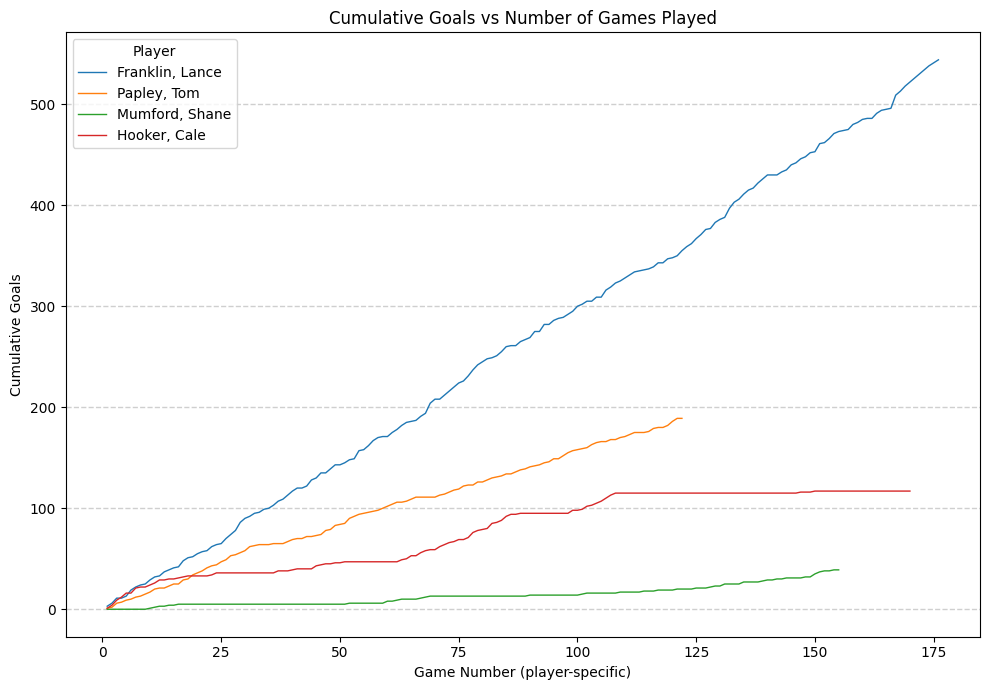

In [28]:
plt.figure(figsize=(10, 7))

# 4 players in a loop

for i, player in enumerate(players):
    player_df = merged_df[merged_df[player_col] == player].copy()
    if player_df.empty:
        print(f"Warning: no rows found for player '{player}'. The player not found.")
        continue

    # Sort by game_number
    player_df = player_df.sort_index()  
    x = np.arange(1, len(player_df) + 1)

    # compute cumulative goals
    cum_goals = player_df[goals_col].fillna(0).cumsum().to_numpy()

    # Plot
    plt.plot(x, cum_goals,
             label=player,
             linestyle='-',
             linewidth=1,
             color=colors[i % len(colors)])
    
# Chart cosmetics
plt.title("Cumulative Goals vs Number of Games Played")
plt.xlabel("Game Number (player-specific)")
plt.ylabel("Cumulative Goals")
plt.grid(axis='y', linestyle='--',linewidth=1 ,alpha=0.6)
plt.legend(title="Player", loc="upper left")
plt.tight_layout()

# Save or show
plt.show()

##### **Analysis Points**:

1. Franklin’s scoring trajectory is significantly higher than the other players - almost ~550 with anaverage of 3.1 goals per game, with a consistently steep and near-linear cumulative goal curve. This indicates both longevity and steady goal-scoring pattern across his career.

2. Though Papley has played least number of games compared to the rest, he has better accumulated goals compared to Mumford and Hooker. Of course, he is 2nd in number of goals accumulated after Franklin.

3. Hooker’s curve rises moderately early in his career, followed by long plateaus later on, he has almost flat graph after ~105 matches. He played till 175 odd matches like Franklin, however did not score much after 100-105 games. These flat segments suggest periods where he either played in non-goal-scoring positions or may have experienced reduced scoring involvement over time.

4. Mumford has the lowest cumulative goal trajectory (around 40 cumulative goals in ~155 games), with a very gentle upward slope. 

### 4. Task 4 - Linear Regression

Here the ask is the following: <br>
Create a second plot showing just "Franklin, Lance" and "Hooker, Cale" but include the linear regression line for each. In other words. as well as showing their actual cummulative goals over time, plot their predicted goals over time where the prediction is done via Linear Regression. Be sure to use different colours for each line and include a legend.

In [30]:
# Select two players
players = ["Franklin, Lance", "Hooker, Cale"]
colors = ["C0", "C3"]

In [31]:
# We will use the merged_df
merged_df.shape

(89470, 48)

In [32]:
merged_df.head(3)

,gameId,team,year_x,round_x,playerId,displayName_x,gameNumber,Disposals,Kicks,Marks,...,round_y,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall
0,2021R104,Adelaide,2021,R1,2021661124,"Berry, Sam",1,8,6,1,...,R1,20-Mar-2021,Adelaide Oval,4:05 PM,26985,Adelaide,103,Geelong,91,0.0
1,2021R104,Adelaide,2021,R1,2012662083,"Brown, Luke",168,5,2,0,...,R1,20-Mar-2021,Adelaide Oval,4:05 PM,26985,Adelaide,103,Geelong,91,0.0
2,2021R104,Adelaide,2021,R1,2020665315,"Butts, Jordon",3,10,5,3,...,R1,20-Mar-2021,Adelaide Oval,4:05 PM,26985,Adelaide,103,Geelong,91,0.0


In [33]:
merged_df.columns

Index(['gameId', 'team', 'year_x', 'round_x', 'playerId', 'displayName_x',
       'gameNumber', 'Disposals', 'Kicks', 'Marks', 'Handballs', 'Goals',
       'Behinds', 'Hit Outs', 'Tackles', 'Rebounds', 'Inside 50s',
       'Clearances', 'Clangers', 'Frees', 'Frees Against', 'Brownlow Votes',
       'Contested Possessions', 'Uncontested Possessions', 'Contested Marks',
       'Marks Inside 50', 'One Percenters', 'Bounces', 'Goal Assists',
       '% Played', 'Subs', 'displayName_y', 'height', 'weight', 'dob',
       'position', 'origin', 'year_y', 'round_y', 'date', 'venue', 'startTime',
       'attendance', 'homeTeam', 'homeTeamScore', 'awayTeam', 'awayTeamScore',
       'rainfall'],
      dtype='object')

In [34]:
# Update column names to match your dataset
player_col = "displayName_x"
goals_col = "Goals"
game_num_col = "gameNumber"

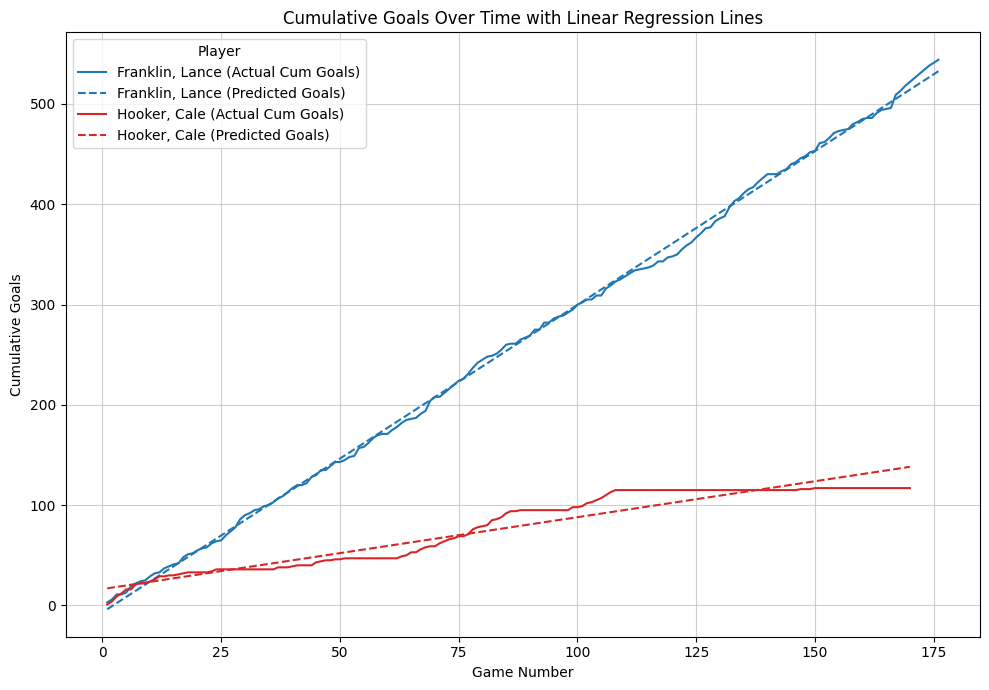

In [35]:
plt.figure(figsize=(10, 7))

# Two players in a loop
for i, player in enumerate(players):
    # Filter player data
    player_df = merged_df[merged_df[player_col] == player].copy()
    
    # Sort by game_number
    player_df = player_df.sort_index()  
    x = np.arange(1, len(player_df) + 1)
    
    # Compute cumulative goals
    y_actual = player_df[goals_col].fillna(0).cumsum().to_numpy()

    # Plot actual data
    plt.plot(x, y_actual,  linestyle='-', color=colors[i],
             label=f"{player} (Actual Cum Goals)")

    # Linear Regression (Predicted Trend)
    model = LinearRegression()
    x_reshaped = x.reshape(-1, 1)
    model.fit(x_reshaped, y_actual)
    y_pred = model.predict(x_reshaped)

    # Plot the Regression line
    plt.plot(x, y_pred, linestyle='--', color=colors[i],
             label=f"{player} (Predicted Goals)")

# Chart Formatting
plt.title("Cumulative Goals Over Time with Linear Regression Lines")
plt.xlabel("Game Number")
plt.ylabel("Cumulative Goals")
plt.legend(title="Player", loc="upper left")
plt.grid(True, linestyle="-", alpha=0.6)
plt.tight_layout()

plt.show()

##### **Analysis points**: <br>

1) Both Franklin and Hooker have played similar no of games, however Franklin has much higher cumulative goals (500+) as opposed to 100+ for Hooker.

2) The predicted lines seem to fit better for Franklin (compared to his actual goals)

### All tasks completed..